# Import libraries

In [1]:
# "pandas" and "numpy" are most useful libraries to process and play around with the data.
import pandas as pd
import numpy as np
# "matplotlib" and "seaborn" are useful libraries to generate graphical plots of data.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#vaderSentiment doesn't exist in colab by default, hence we need to install it.
!pip install vaderSentiment #This line downloads and install the vaderSentiment library for us. Every time we run colab, we may have to do this.

#From the vader sentiment we import the SentimentIntensityAnalyzer component which is useful for determening the sentiment of textual data.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00





# Upload file and read the data

In [3]:

# We use the files component from google.colab to handle file uploads and downloads using code.
from google.colab import files
#upload_read helps us upload a file and reads the data of the uploaded filej
def upload_read():

  f=files.upload()  #files has an upload function that prompts the user to choose a file from their computer and upload it.
  keys=list(f.keys()) #Gets the name of the file that was uploaded. Colab stores information about the uploaded file in a dictionary form, the key is the filename hence we get the keys
  #If the file name ends with the extension 'xlsx' then it is a excel file
  if keys[0].endswith('xlsx'):

    df=pd.read_excel(keys[0]) #We read the excel file and store the data in the variable df as a dataframe (tabular format). The read function is availble in pandas by default
    return df
  #If the file name ends with the extension 'csv' then it is a csv file
  elif keys[0].endswith('csv'):
    df=pd.read_csv(keys[0])  #We read the csv file and store the data in the variable df as a dataframe (tabular format). The read function is availble in pandas by default

    return df
  else: #Incase the file is neither excel or csv, we return 'neither excel or csv'
    return 'Neither Excel nor CSV file, please check the uploaded file'


In [15]:
#This calls the upload_read function that enables us to upload the desired file and read the data.
data=upload_read()

Saving Intent_recommendation.xlsx to Intent_recommendation (2).xlsx


In [10]:
 #DataFrames in Pandas hae the function head which enables us to see the first five rows
data.head()

,Intent,Category1,Example,Count,Original recommended intent sort,Original example sort within recommended intent
0,mascara,mascara,This mascara is awesome,1,1,1
1,mascara,mascara,My go to mascara,1,1,2
2,mascara,mascara,I love this mascara,2,1,3
3,mascara,mascara,This mascara is 10/10,1,1,4
4,mascara,mascara,This is my favourite Mascara,1,1,5


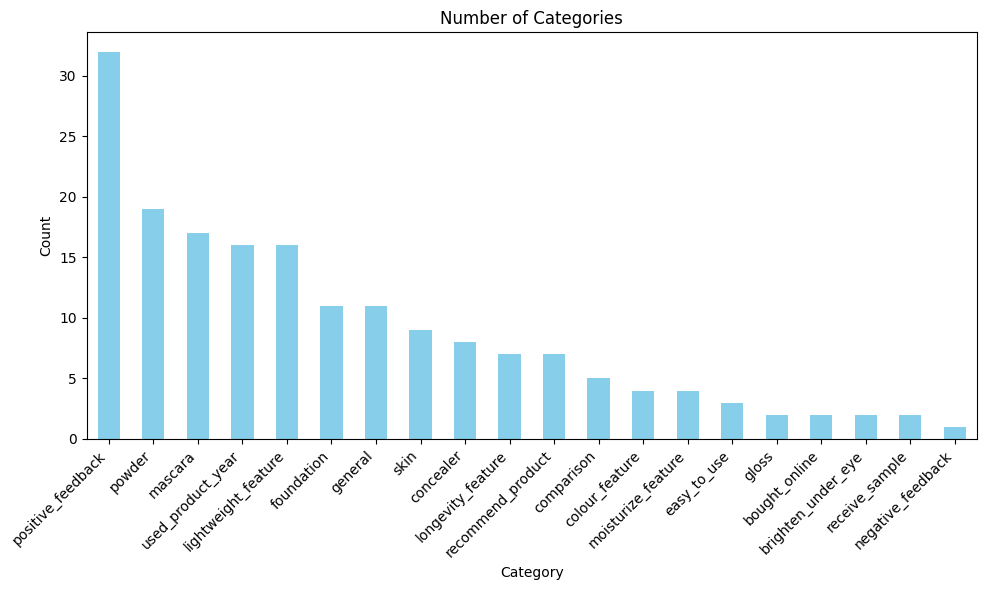

In [29]:
# Extract the category column
categories = data['Category1']

# Count the occurrences of each category
category_counts = categories.value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#1. Product review sentiment analysis using VADER


**What is VADER?**

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool.


The VADER library returns 4 values such as:

**pos:** The probability of the sentiment to be positive

**neu:** The probability of the sentiment to be neutral

**neg:** The probability of the sentiment to be negative

**compound:** The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1


## Get sentiment score

In [30]:
analyzer = SentimentIntensityAnalyzer()  # to store the analyzed method, now analyzer can access all the attributes of SentimentIntensityAnalyzer()

In [31]:
#define get_sentiment_score function to calculate sentiment score from each sentence. Sentiment score tells us how negative, positive or neutral a text is.
def get_sentiment_score(all_sentences):

  """
  get all sentiment score from each sentence
  input: all_sentences
  output: sentiment score

  """
  #Create an empty list to store the sentiment scores
  sentiment_score_list = []
  for sentence in all_sentences: # We go through each of the sentence from the collection of sentences in a loop
    try: #Try typically attempts to execute the code following it when it comes across an error or fails, it executes the except block.
      #From the analyzer we use the polarity_scores method to calculate the sentiment of the sentnce
      sentiment_score = analyzer.polarity_scores(sentence)
      #Then we add the score details to the sentiment_score_list
      sentiment_score_list.append(sentiment_score)
    except: #When there is an error (program wise) in computing the sentiment, the following code gets executed.
      print(sentence) #print the sentence that had an error
  return sentiment_score_list

In [32]:
#get all review sentences from all data
#you might replace 'Example' to the column that stores product review sentences in your data
all_sentences = data['Example'].values

In [33]:
#call get_sentiment_score function
sentiment_score_list = get_sentiment_score(all_sentences)

In [34]:
#Convert the list to a dataFrame using the DataFrame function in Pandas
df_sentiment = pd.DataFrame(sentiment_score_list)
#Shows the first five rows of df_sentiment
df_sentiment.head()

,neg,neu,pos,compound
0,0.0,0.423,0.577,0.6249
1,0.0,1.000,0.000,0.0000
2,0.0,0.417,0.583,0.6369
3,0.0,1.000,0.000,0.0000
4,0.0,1.000,0.000,0.0000


## Combine all sentences with its sentiment score

In [35]:
# concat: concatenation of data; concat from pandas helps us combine/concatenate data from multiple data frames row-wise and column-wise
df_sentiment = pd.concat([data, df_sentiment], axis = 1) #axis=1 dicatates the data to combined column wise.
df_sentiment.head(5)

,Intent,Category1,Example,Count,Original recommended intent sort,Original example sort within recommended intent,neg,neu,pos,compound
0,mascara,mascara,This mascara is awesome,1,1,1,0.0,0.423,0.577,0.6249
1,mascara,mascara,My go to mascara,1,1,2,0.0,1.000,0.000,0.0000
2,mascara,mascara,I love this mascara,2,1,3,0.0,0.417,0.583,0.6369
3,mascara,mascara,This mascara is 10/10,1,1,4,0.0,1.000,0.000,0.0000
4,mascara,mascara,This is my favourite Mascara,1,1,5,0.0,1.000,0.000,0.0000


In [ ]:
#to_csv function part of dataframes helps us write the data in dataframes to a file (csv)
df_sentiment.to_csv('sentiment_score.csv')
#you can find the document in the left panel

#2. Draw simple Importance-Satisfaction Plot

## Satisfaction: calucate the average sentiment score (using "Compound score" across sentences in each category

In [36]:
#get average sentiment (satisfaction) score from each category
#you might replace 'Category3' to the column that stores review category in your data
satisfaction = df_sentiment['compound'].groupby(df_sentiment['Category1']).mean()
satisfaction

Category1
bought_online          0.000000
brighten_under_eye     0.400800
colour_feature         0.812975
comparison             0.402740
concealer              0.057563
easy_to_use            0.788600
foundation             0.560718
general                0.135664
gloss                  0.611400
lightweight_feature    0.443581
longevity_feature      0.462057
mascara                0.315453
moisturize_feature     0.286875
negative_feedback      0.000000
positive_feedback      0.532097
powder                 0.456184
receive_sample         0.000000
recommend_product      0.392043
skin                   0.074756
used_product_year      0.062963
Name: compound, dtype: float64

## Importance: Count the frequency of sentences in each cateogry

In [37]:
#Count total number appearnce of each category
df_sentiment['count'] = 1
importance = df_sentiment['count'].groupby(df_sentiment['Category1']).sum()
importance


Category1
bought_online           2
brighten_under_eye      2
colour_feature          4
comparison              5
concealer               8
easy_to_use             3
foundation             11
general                11
gloss                   2
lightweight_feature    16
longevity_feature       7
mascara                17
moisturize_feature      4
negative_feedback       1
positive_feedback      32
powder                 19
receive_sample          2
recommend_product       7
skin                    9
used_product_year      16
Name: count, dtype: int64

In [38]:
#get satisfaction each category
satisfaction_each_category = pd.DataFrame([importance, satisfaction])
satisfaction_each_category


Category1,bought_online,brighten_under_eye,colour_feature,comparison,concealer,easy_to_use,foundation,general,gloss,lightweight_feature,longevity_feature,mascara,moisturize_feature,negative_feedback,positive_feedback,powder,receive_sample,recommend_product,skin,used_product_year
count,2.0,2.0000,4.000000,5.00000,8.000000,3.0000,11.000000,11.000000,2.0000,16.000000,7.000000,17.000000,4.000000,1.0,32.000000,19.000000,2.0,7.000000,9.000000,16.000000
compound,0.0,0.4008,0.812975,0.40274,0.057563,0.7886,0.560718,0.135664,0.6114,0.443581,0.462057,0.315453,0.286875,0.0,0.532097,0.456184,0.0,0.392043,0.074756,0.062963


In [39]:
#Transposes the data i.e swaps columns and rows.
plot_data = satisfaction_each_category.T

# #drop less relevant categories
plot_data = plot_data.drop(['positive_feedback','negative_feedback','general', 'used_product_year', 'comparison', 'recommend_product'], axis =0)
# postive_feedback_product example: "I love it" (general sentiment, not about particular product or product attribute)

plot_data = plot_data.reset_index()
plot_data


,Category1,count,compound
0,bought_online,2.0,0.000000
1,brighten_under_eye,2.0,0.400800
2,colour_feature,4.0,0.812975
3,concealer,8.0,0.057563
4,easy_to_use,3.0,0.788600
5,foundation,11.0,0.560718
6,gloss,2.0,0.611400
7,lightweight_feature,16.0,0.443581
8,longevity_feature,7.0,0.462057
9,mascara,17.0,0.315453


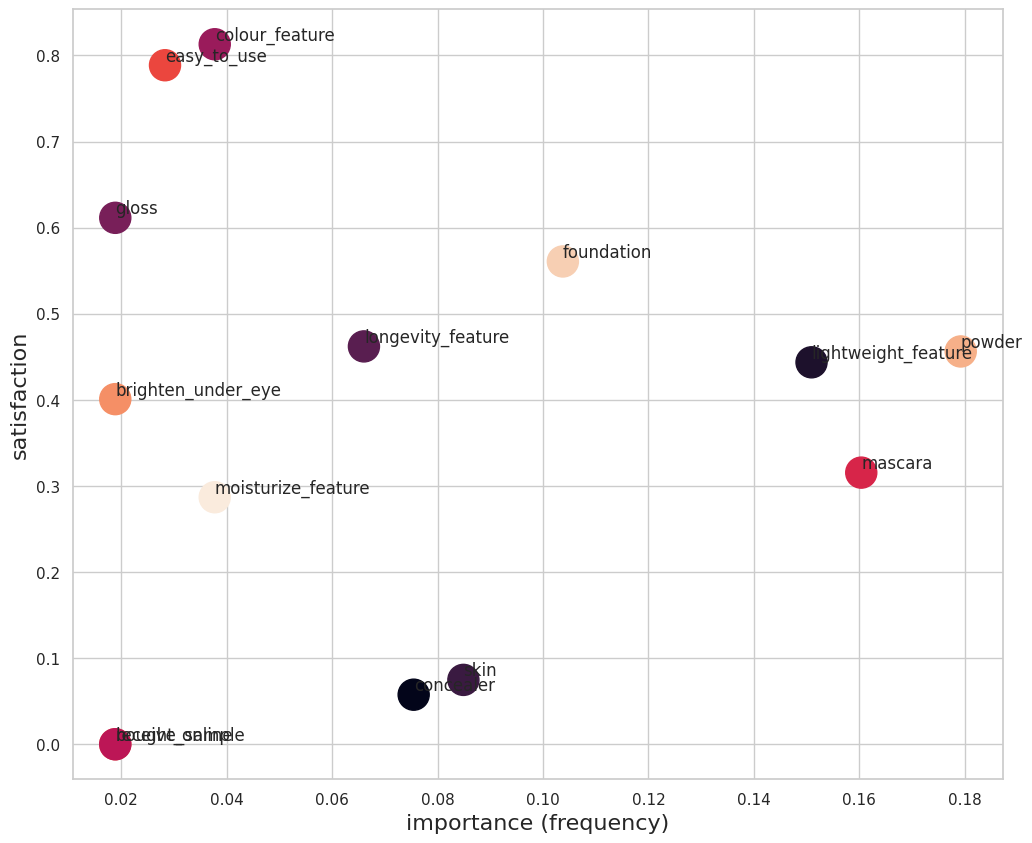

In [40]:
#Get the total number of sentences over all categories
total_sentences = plot_data["count"].sum()

#get whitegrid on the plot
sns.set(style = "whitegrid")

#set the x axis
x_axis = plot_data['count'].apply(lambda sentence: sentence/ total_sentences)

#set the y axis
y_axis = plot_data['compound']

#set label for each circle
label = plot_data['Category1']

#create a scatter plot
fig,ax = plt.subplots(figsize = (12,10)) #Set the dimensional size of the plot to be (12,10)
#create bubbles for each categories along with the name of the categories and assign a color to each of them
bubble = ax.scatter(x=x_axis,y=y_axis, s = 500, c=np.random.choice(len(plot_data.Category1.unique()), len(plot_data.Category1.unique()), replace=False))

#add legend
for a,b,c in zip(x_axis,y_axis,label):
   plt.text(a,b+0.005,'%s'%c)



#set label on x axis
ax.set_xlabel('importance (frequency)', fontsize = 16)

#set label on y axis
ax.set_ylabel('satisfaction', fontsize = 16)


#Display the plot
plt.show()
